### 2. Trips based on precipitation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])
from statistics import mean
from datetime import date

### Data Preparation for analysis

In [2]:
# import prepared data set
df_la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time","Date"],low_memory=False)
df_weather = pd.read_csv("prepared_data_weather.csv", parse_dates=["date_time"],low_memory=False)

In [3]:
df_la.head(1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Day,Month,Weekday,Hour,Day_of_year
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,1


In [4]:
df_la.tail(1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Day,Month,Weekday,Hour,Day_of_year
283134,290341,2019-12-31 23:58:52,2020-01-01 00:25:27,3074,3049,19053,Annual Pass,Hope & Olympic,2nd & Figueroa,26.0,2019-12-31,31,12,1,23,365


In [5]:
df_weather.head(2)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6
1,35041,2019-01-01 02:00:00,15.0,15.0,0.0,2019.0,15.0


In [6]:
# getting number of trips per hour
def get_trips_hour(datetime):
    return df_la[(df_la["Month"] == datetime.month) & (df_la["Day"] == datetime.day) & (df_la["Hour"] == datetime.hour)].size

In [7]:
df_weather["num_trips_hour"] = df_weather["date_time"].apply(get_trips_hour)

In [8]:
# getting number of trips per day
def get_trips_day(datetime):
    return df_la[(df_la["Month"] == datetime.month) & (df_la["Day"] == datetime.day)].size

In [9]:
df_weather["num_trips_day"] = df_weather["date_time"].apply(get_trips_day)

In [10]:
df_weather.head(5)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp,num_trips_hour,num_trips_day
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6,128,8080
1,35041,2019-01-01 02:00:00,15.0,15.0,0.0,2019.0,15.0,256,8080
2,35042,2019-01-01 03:00:00,15.0,15.0,0.0,2019.0,15.0,32,8080
3,35043,2019-01-01 04:00:00,13.9,13.9,0.0,2019.0,13.9,0,8080
4,35044,2019-01-01 05:00:00,12.2,12.2,0.0,2019.0,12.2,0,8080


### Overview Trips and Precipitation per hour of the year

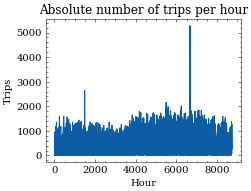

In [11]:
# Overview trips per hour of year
plt.plot(df_weather.index, df_weather["num_trips_hour"], label='Trips per hour')
plt.title('Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

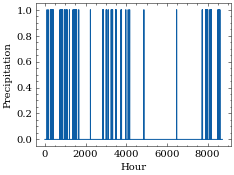

In [12]:
# Overview precipitation per hour of year
plt.plot(df_weather.index, df_weather["precip"], label='Precipitation per hour with 1 = precipitation and 0 = no precipitation')
plt.ylabel('Precipitation')
plt.xlabel('Hour')
plt.show()

### Combine the two datasets

In [13]:
def replace_minutes(dt):
    return dt.replace(minute=0, second=0)

In [14]:
df_la.rename(columns={'start_time':'date_time'}, inplace=True)
df_la["date_time"] = df_la["date_time"].apply(replace_minutes)
df_la.tail(3)

,Unnamed: 0,date_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Day,Month,Weekday,Hour,Day_of_year
283132,290339,2019-12-31 23:00:00,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,4.0,2019-12-31,31,12,1,23,365
283133,290340,2019-12-31 23:00:00,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,5.0,2019-12-31,31,12,1,23,365
283134,290341,2019-12-31 23:00:00,2020-01-01 00:25:27,3074,3049,19053,Annual Pass,Hope & Olympic,2nd & Figueroa,26.0,2019-12-31,31,12,1,23,365


In [15]:
df_la = pd.merge(df_la, df_weather, how="left", on =["date_time"])
df_la.head(3)

,Unnamed: 0_x,date_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,...,Hour,Day_of_year,Unnamed: 0_y,max_temp,min_temp,precip,year,temp,num_trips_hour,num_trips_day
0,0,2019-01-01,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,...,0,1,35063.0,15.6,15.6,0.0,2019.0,15.6,304.0,8080.0
1,1,2019-01-01,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,...,0,1,35063.0,15.6,15.6,0.0,2019.0,15.6,304.0,8080.0
2,2,2019-01-01,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,...,0,1,35063.0,15.6,15.6,0.0,2019.0,15.6,304.0,8080.0


### Number of rides based on Precipitation

In [16]:
# number of rides without and with precipitation
precip_count = pd.DataFrame()
precip_count["precip_count"] = df_la["precip"].value_counts()
precip_count.sort_index(inplace=True)
precip_count.head()

,precip_count
0.0,277001
1.0,5602


Text(0, 0.5, 'Trips')

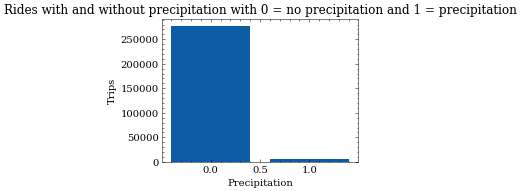

In [17]:
# number of rides without and with precipitation
plt.bar(precip_count.index, precip_count["precip_count"], label='Trips for precipitation')
plt.title("Rides with and without precipitation with 0 = no precipitation and 1 = precipitation")
plt.xlabel('Precipitation') 
plt.ylabel('Trips')

### Trips based on precipitation per hour

In [18]:
precip_trips_hour = df_weather
precip_trips_hour = precip_trips_hour.drop(columns=["Unnamed: 0","year","temp","num_trips_day"])
precip_trips_hour.head(5)

,date_time,max_temp,min_temp,precip,num_trips_hour
0,2019-01-01 01:00:00,15.6,15.6,0.0,128
1,2019-01-01 02:00:00,15.0,15.0,0.0,256
2,2019-01-01 03:00:00,15.0,15.0,0.0,32
3,2019-01-01 04:00:00,13.9,13.9,0.0,0
4,2019-01-01 05:00:00,12.2,12.2,0.0,0


In [19]:
# Mean of number of trips per hour when precipitation
hours_with_precip = precip_trips_hour[precip_trips_hour["precip"] == 1]
hours_with_precip["num_trips_hour"].mean()

350.125

In [20]:
# Mean of numbers of trips per hours when no precipitation
hours_without_precip = precip_trips_hour[precip_trips_hour["precip"] == 0]
hours_without_precip["num_trips_hour"].mean()

522.8900424728646

In [21]:
precip_trips_hour.head(1)

,date_time,max_temp,min_temp,precip,num_trips_hour
0,2019-01-01 01:00:00,15.6,15.6,0.0,128


In [32]:
precip_trips_hour.to_csv('datasets_merged_hour.csv')

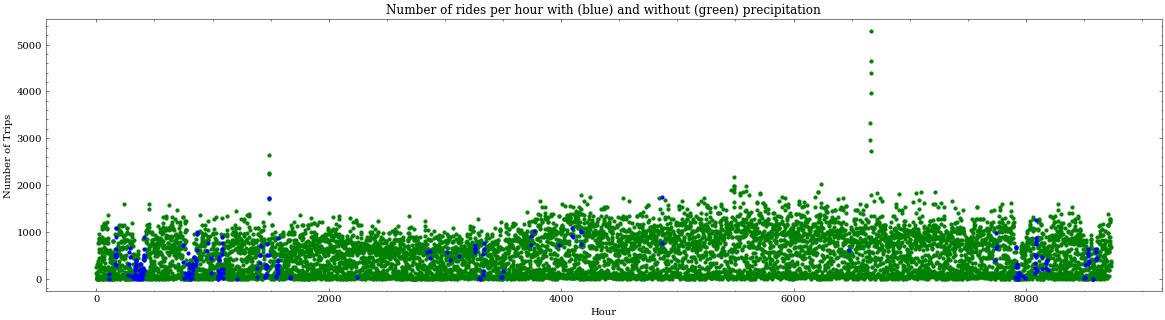

In [22]:
# number of rides per hour with and without precipitation
plt.figure(figsize = (20,5))
plt.scatter(hours_without_precip.index, hours_without_precip["num_trips_hour"], color = 'g', s=10)
plt.scatter(hours_with_precip.index, hours_with_precip["num_trips_hour"], color = 'b', s=10)
plt.xlabel("Hour")
plt.ylabel("Number of Trips")
plt.title("Number of rides per hour with (blue) and without (green) precipitation")
plt.show()

### Trips based on precipitation per day

In [23]:
# per day
precip_trips_day_1 = df_la.resample("D", on="date_time").agg({'num_trips_day':'max'})
precip_trips_day_1.info(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_trips_day  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [24]:
precip_trips_day_2 = df_weather.resample("D", on="date_time").agg({'max_temp':'max', 'min_temp': 'min','precip':'sum'})
precip_trips_day_2.info(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Freq: D
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  365 non-null    float64
 1   min_temp  365 non-null    float64
 2   precip    365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


In [25]:
precip_trips_day = pd.merge(precip_trips_day_1, precip_trips_day_2, how="left", on =["date_time"])

In [26]:
precip_trips_day.head(2)

,num_trips_day,max_temp,min_temp,precip
date_time,,,,
2019-01-01,8080.0,16.7,6.1,0.0
2019-01-02,10656.0,16.1,4.4,0.0


In [27]:
precip_trips_day.tail(2)

,num_trips_day,max_temp,min_temp,precip
date_time,,,,
2019-12-30,13248.0,17.8,11.7,0.0
2019-12-31,13184.0,22.8,10.6,0.0


In [28]:
# Mean of number of day when precipitation
days_with_precip = precip_trips_day[precip_trips_day["precip"] != 0] # here maybe >=2 oder so setzen
#hours_with_precip.head(2)
days_with_precip["num_trips_day"].mean()

8862.518518518518

In [29]:
# Mean of numbers of trips per day when no precipitation
days_without_precip = precip_trips_day[precip_trips_day["precip"] == 0]
days_without_precip["num_trips_day"].mean()

13027.601286173633

In [30]:
precip_trips_day.head(1)

,num_trips_day,max_temp,min_temp,precip
date_time,,,,
2019-01-01,8080.0,16.7,6.1,0.0


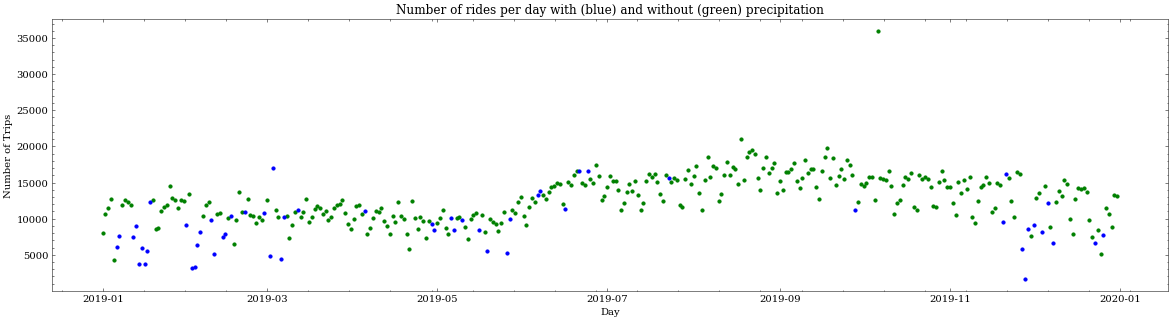

In [31]:
# number of rides per day with and without precipitation
plt.figure(figsize = (20,5))
plt.scatter(days_without_precip.index, days_without_precip["num_trips_day"], color = 'g', s=10)
plt.scatter(days_with_precip.index, days_with_precip["num_trips_day"], color = 'b', s=10)
plt.xlabel("Day")
plt.ylabel("Number of Trips")
plt.title("Number of rides per day with (blue) and without (green) precipitation")
plt.show()